<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Exercise 2) Callback to Stop Model Training</b><br>
Write a simple callback that stops the model training if the validation accuracy in the notebook "6-06_ConvolutionalNeuralNetwork_Keras.ipynb" or any other code you choose reaches 75%.
</div>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])
    
    return X_train, y_train, X_test, y_test

Hoda persian digits classification

In [3]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [4]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

defining the required callback

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs)
        if(logs.get('accuracy')>0.75):
            print("_______"*10)
            print("_______"*10)
            print("\n********Reached 75% accuracy so cancelling training!*********")
            print("_______"*10)
            print("_______"*10)
            self.model.stop_training = True
            
callbacks = myCallback()

In [6]:
history = model.fit(X_train, y_train,
          epochs=10, batch_size=256, validation_data =(X_test,y_test), callbacks=[callbacks] )

Epoch 1/10
14/14 [==============================] - 1s 63ms/step - loss: 2.0914 - accuracy: 0.2714 - val_loss: 1.5026 - val_accuracy: 0.6675
Epoch 2/10
14/14 [==============================] - 1s 56ms/step - loss: 1.2699 - accuracy: 0.5820 - val_loss: 0.6168 - val_accuracy: 0.8225
Epoch 3/10
14/14 [==============================] - 1s 58ms/step - loss: 0.8005 - accuracy: 0.7334 - val_loss: 0.3940 - val_accuracy: 0.8800
Epoch 4/10
13/14 [==========================>...] - ETA: 0s - loss: 0.6111 - accuracy: 0.7954{'loss': 0.6033279299736023, 'accuracy': 0.7985714077949524, 'val_loss': 0.2714630961418152, 'val_accuracy': 0.9175000190734863}
______________________________________________________________________
______________________________________________________________________

********Reached 75% accuracy so cancelling training!*********
______________________________________________________________________
______________________________________________________________________
14/14 [=

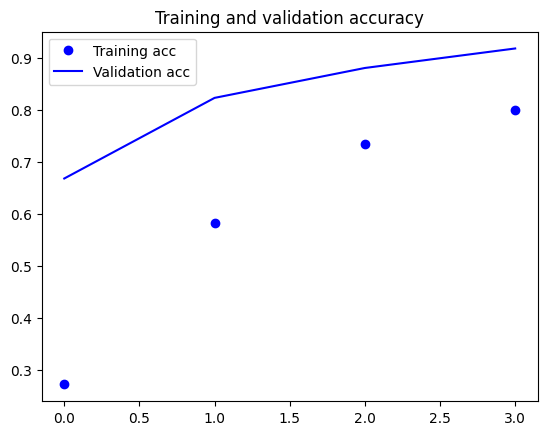

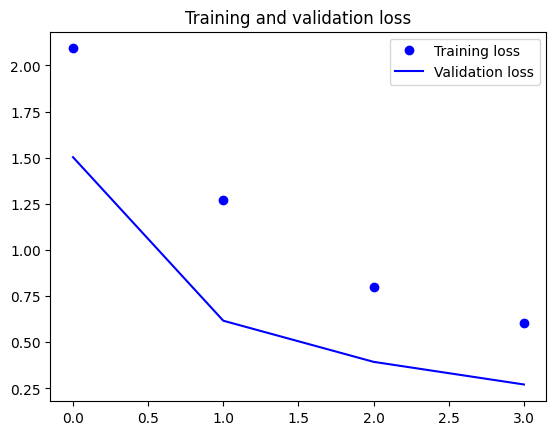

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()